# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     2.973083e+01     6.578201e+00
 * time: 0.004987955093383789
     1     2.704955e+01     5.743712e+00
 * time: 0.015208959579467773
     2     1.640380e+01     2.741870e+00
 * time: 0.04468488693237305
     3     1.316152e+01     2.707080e+00
 * time: 0.0700540542602539
     4     1.314932e+01     2.539475e+00
 * time: 0.09041285514831543
     5     1.135751e+01     2.581821e+00
 * time: 0.11048293113708496
     6     1.034571e+01     1.947586e+00
 * time: 0.13019204139709473
     7     9.595780e+00     1.716172e+00
 * time: 0.14956903457641602
     8     9.055167e+00     8.879355e-01
 * time: 0.16900396347045898
     9     8.771020e+00     1.036612e+00
 * time: 0.1886458396911621
    10     8.607413e+00     6.010314e-01
 * time: 0.20799994468688965
    11     8.580242e+00     1.043756e+00
 * time: 0.22414088249206543
    12     8.509125e+00     6.388545e-01
 * time: 0.23864102363586426
    13     8.474513e+00     5.643450e-01
 * time:

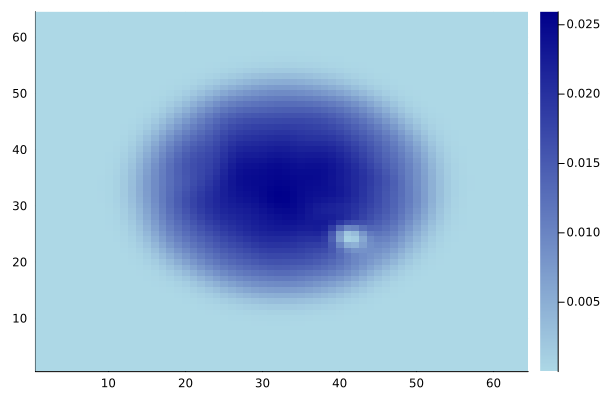

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)